In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [28]:
# Load the Iris dataset
df = pd.read_csv('iris.csv')

In [29]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[-0.05021989 -0.88029181  0.34753171  0.28206327]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13597027  0.09659843  0.996271    1.01717187]]


In [34]:
df['species_encoded'] = df['species'].astype('category').cat.codes
mapping = {}
for i in range(3):
    mask = df['cluster'] == i
    most_common = df[mask]['species_encoded'].value_counts().idxmax()
    mapping[i] = most_common
df['predicted_species'] = df['cluster'].map(mapping)

In [35]:
acc = accuracy_score(df['species_encoded'], df['predicted_species'])
cm = confusion_matrix(df['species_encoded'], df['predicted_species'])
print(f"\n Clustering Accuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:\n", cm)


 Clustering Accuracy: 83.33%

Confusion Matrix:
 [[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]


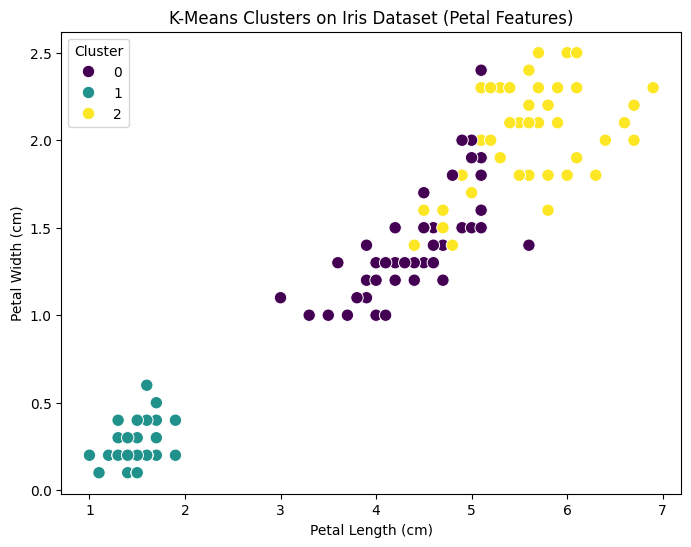

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['petal_length'],
    y=df['petal_width'],
    hue=df['cluster'],
    palette='viridis',
    s=80
)
plt.title('K-Means Clusters on Iris Dataset (Petal Features)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster')
plt.show()



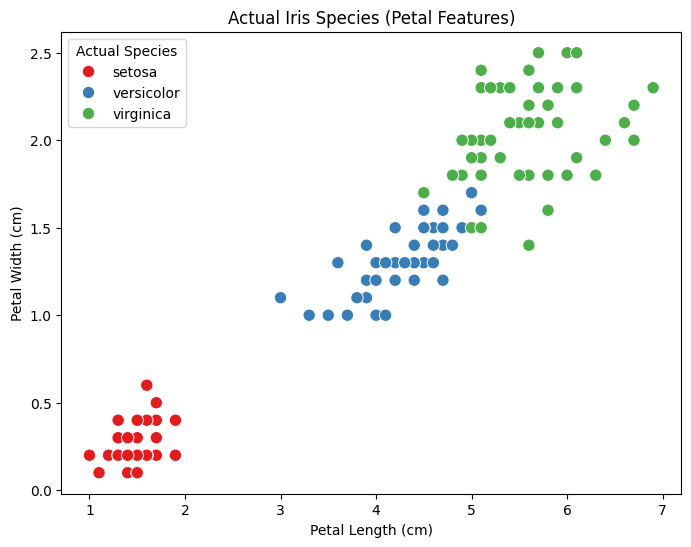

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['petal_length'],
    y=df['petal_width'],
    hue=df['species'],
    palette='Set1',
    s=80
)
plt.title('Actual Iris Species (Petal Features)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Actual Species')
plt.show()
